In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [100]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [101]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [102]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    #'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [103]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [110]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')
original_df['playerDepth'] = original_df['playerDepth'].replace(np.nan, '1')
original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'

original_df.to_csv('original_df.csv')

100%|██████████| 76/76 [00:02<00:00, 30.30it/s]


In [105]:
original_df.head()

,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,Q1ReachedKnowledgeStep,...,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,almostRatio,playerDepth,Sum_Matched
0,1,300,2023-05-21 04:18:54.310,7c6ae160,0,213,0.860000,0.669748,-1,-1,...,2,3,mcts,0,1,knowledge,100,0.75,1,486
1,2,303,2023-05-21 04:21:26.273,7c6ae160,0,223,0.947195,0.712135,117,54,...,2,3,mcts,0,1,knowledge,100,0.75,1,414
2,3,300,2023-05-21 04:23:38.134,7c6ae160,0,234,0.913333,0.611338,94,41,...,2,3,mcts,0,1,knowledge,100,0.75,1,456
3,4,301,2023-05-21 04:25:35.225,7c6ae160,0,201,0.784053,0.640217,86,86,...,2,3,mcts,0,1,knowledge,100,0.75,1,354
4,5,301,2023-05-21 04:27:34.357,7c6ae160,0,203,0.790698,0.657809,121,71,...,2,3,mcts,0,1,knowledge,100,0.75,1,378


In [106]:
original_df.columns.values.tolist()

['EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'Q1ReachedKnowledgeStep',
 'Q2ReachedKnowledgeStep',
 'Q3ReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'almostRatio',
 'playerDepth',
 'Sum_Matched']

In [107]:
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
1      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
2      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
3      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   

                                                           Q1ReachedKnowledgeStep  \
                                                                             mean   
player method objective playerDepth almostRatio simulation                          
0      m

In [108]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

{'mcts_knowledge_0.75_100_1',
 'mcts_knowledge_0.75_100_2',
 'mcts_knowledge_0.75_200_1',
 'mcts_knowledge_0.75_200_2',
 'mcts_knowledge_0.75_400_1',
 'mcts_knowledge_0.75_400_2',
 'mcts_knowledge_1.0_100_1',
 'mcts_knowledge_1.0_100_2',
 'mcts_knowledge_1.0_200_1',
 'mcts_knowledge_1.0_200_2',
 'mcts_knowledge_1.0_400_1',
 'mcts_knowledge_1.0_400_2',
 'mcts_score_100_1',
 'mcts_score_100_2',
 'mcts_score_200_1',
 'mcts_score_200_2',
 'mcts_score_400_1',
 'mcts_score_400_2',
 'random'}


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'r_step'),
  Text(1, 0, 'b0'),
  Text(2, 0, 'b1'),
  Text(3, 0, 'b2'),
  Text(4, 0, 'b3'),
  Text(5, 0, 'b4'),
  Text(6, 0, 'b5')])

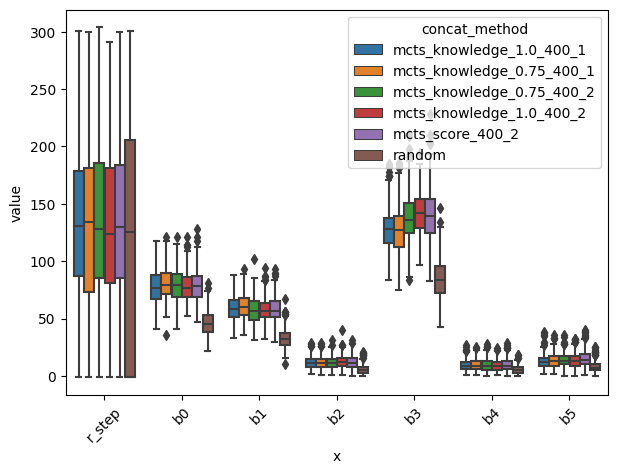

In [109]:
melted_df = original_df.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation', 'player']).sample(n=100, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
# melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df)
plt.xticks(rotation=45)